In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#creating image preprocessing framework here

batch_size = 32
img_height = 64
img_width = 64

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
directory = "C:\\Python_Developement\\deeplearning_projects\\CNN\\dataset\\training_set"

# Prprocessing data -- creating datasets (train and test sets with val sets in each using keras image preprocessing)

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8000 files belonging to 2 classes.
Using 6400 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8000 files belonging to 2 classes.
Using 1600 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


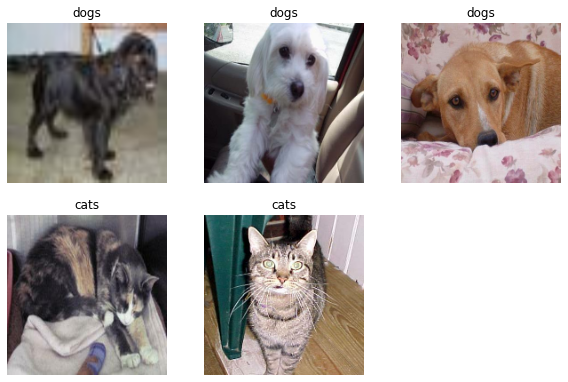

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(5):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [13]:
## this is truly experimemtal from tf side -- its is used to imporove data performance (
##  basically improves the data speed by puttin it in thje memory and disk cache read source (tf documentation)) 
##experimental
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [20]:
## creating final model

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3,activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3,activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1,activation='sigmoid')
])



In [21]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 87, 87, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 20, 20, 64)       

In [23]:
%%time
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
200/200 [==============================] - 14s 25ms/step - loss: 0.7640 - accuracy: 0.5297 - val_loss: 0.6673 - val_accuracy: 0.6369
Epoch 2/10
200/200 [==============================] - 3s 17ms/step - loss: 0.6190 - accuracy: 0.6534 - val_loss: 0.5718 - val_accuracy: 0.7006
Epoch 3/10
200/200 [==============================] - 3s 16ms/step - loss: 0.5400 - accuracy: 0.7287 - val_loss: 0.5144 - val_accuracy: 0.7506
Epoch 4/10
200/200 [==============================] - 3s 16ms/step - loss: 0.4747 - accuracy: 0.7713 - val_loss: 0.5116 - val_accuracy: 0.7569
Epoch 5/10
200/200 [==============================] - 3s 16ms/step - loss: 0.3982 - accuracy: 0.8141 - val_loss: 0.5089 - val_accuracy: 0.7550
Epoch 6/10
200/200 [==============================] - 3s 16ms/step - loss: 0.3105 - accuracy: 0.8585 - val_loss: 0.5071 - val_accuracy: 0.7606
Epoch 7/10
200/200 [==============================] - 3s 16ms/step - loss: 0.2424 - accuracy: 0.9036 - val_loss: 0.5978 - val_accuracy: 0.746

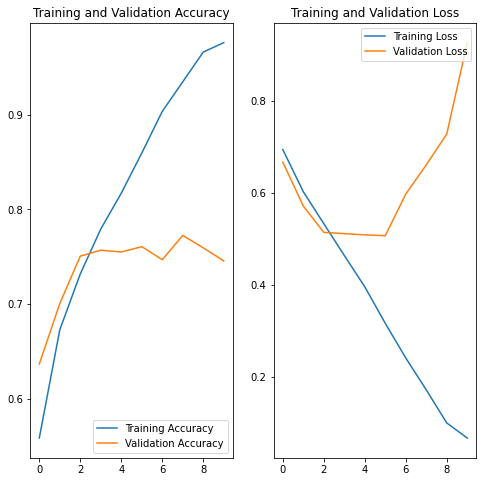

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [26]:
## creating final model

model = Sequential([
    data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3,activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3,activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1,activation='sigmoid')
])

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 87, 87, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 41, 41, 64)       

In [30]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [31]:
%%time
epochs = 12
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/12
200/200 [==============================] - 5s 20ms/step - loss: 0.7042 - accuracy: 0.5350 - val_loss: 0.6216 - val_accuracy: 0.6431
Epoch 2/12
200/200 [==============================] - 4s 19ms/step - loss: 0.6027 - accuracy: 0.6751 - val_loss: 0.5650 - val_accuracy: 0.7131
Epoch 3/12
200/200 [==============================] - 4s 19ms/step - loss: 0.5785 - accuracy: 0.6963 - val_loss: 0.5836 - val_accuracy: 0.6913
Epoch 4/12
200/200 [==============================] - 4s 19ms/step - loss: 0.5631 - accuracy: 0.7169 - val_loss: 0.5175 - val_accuracy: 0.7431
Epoch 5/12
200/200 [==============================] - 4s 19ms/step - loss: 0.5197 - accuracy: 0.7439 - val_loss: 0.4920 - val_accuracy: 0.7563
Epoch 6/12
200/200 [==============================] - 4s 18ms/step - loss: 0.5162 - accuracy: 0.7455 - val_loss: 0.5073 - val_accuracy: 0.7631
Epoch 7/12
200/200 [==============================] - 4s 19ms/step - loss: 0.4835 - accuracy: 0.7608 - val_loss: 0.5047 - val_accuracy: 0.7600

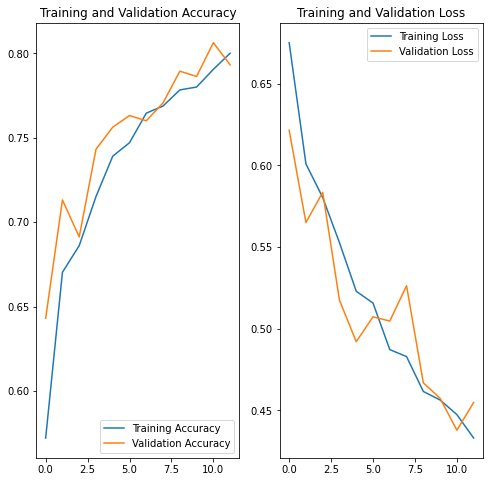

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [39]:
img = keras.preprocessing.image.load_img(
    'dataset/single_prediction/cat_or_dog_1.jpg', target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to cats with a 100.00 percent confidence.


In [40]:
model.save("cat_dog_classifier.h5")

In [41]:
model.save("mymodel/")

INFO:tensorflow:Assets written to: mymodel/assets
